In [3]:
import sys
sys.path.append('..')

In [4]:
from nbhd import data

In [5]:
db = data.Base()

Initializing database connection...
Database connected!


In [7]:
from shapely.geometry import Point

In [8]:
p_centroid = Point([475000,175000])

In [10]:
p = db.contains('pixels', p_centroid)

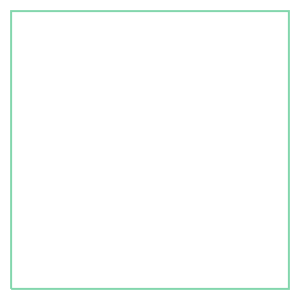

In [12]:
p.geometry.boundary[0]

In [13]:
pprops = db.within('properties', p.geometry[0])

<AxesSubplot:>

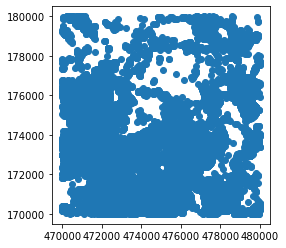

In [14]:
pprops.plot()

In [15]:
# zoom in

In [18]:
pprops2 = db.within('properties', p_centroid.buffer(1000))

<AxesSubplot:>

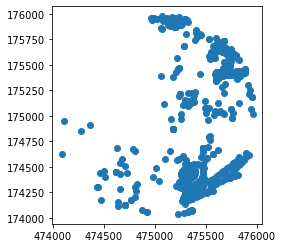

In [19]:
pprops2.plot()

In [20]:
from nbhd.geometry import cellularize

In [21]:
cellularize?

Signature: cellularize(pts_geoseries, polygon)
Docstring: Return geodataframe of Voronoi cells for points in polygon.
File:      ~/code/nbhd/geometry.py
Type:      function


In [23]:
cells = cellularize(pprops2.geometry, p_centroid.buffer(1000))

In [24]:
from mapclassify import greedy

In [25]:
cells['c'] = greedy(cells)

<AxesSubplot:>

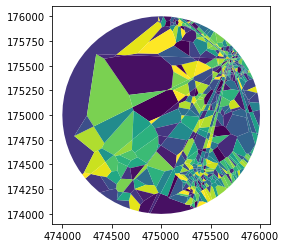

In [26]:
cells.plot('c')

In [32]:
roads = db.intersects('roads', p_centroid.buffer(1000))

<AxesSubplot:>

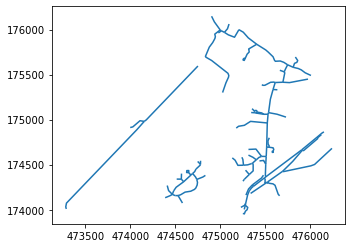

In [33]:
roads.plot()

In [50]:
buildings = db.intersects('buildings', p_centroid.buffer(1000))

In [42]:
from shapely.geometry import MultiPolygon, MultiLineString

In [52]:
all_b = MultiPolygon(buildings.geometry.values)

In [53]:
properties = db.intersects('properties', all_b)

In [37]:
import matplotlib.pyplot as plt

<AxesSubplot:>

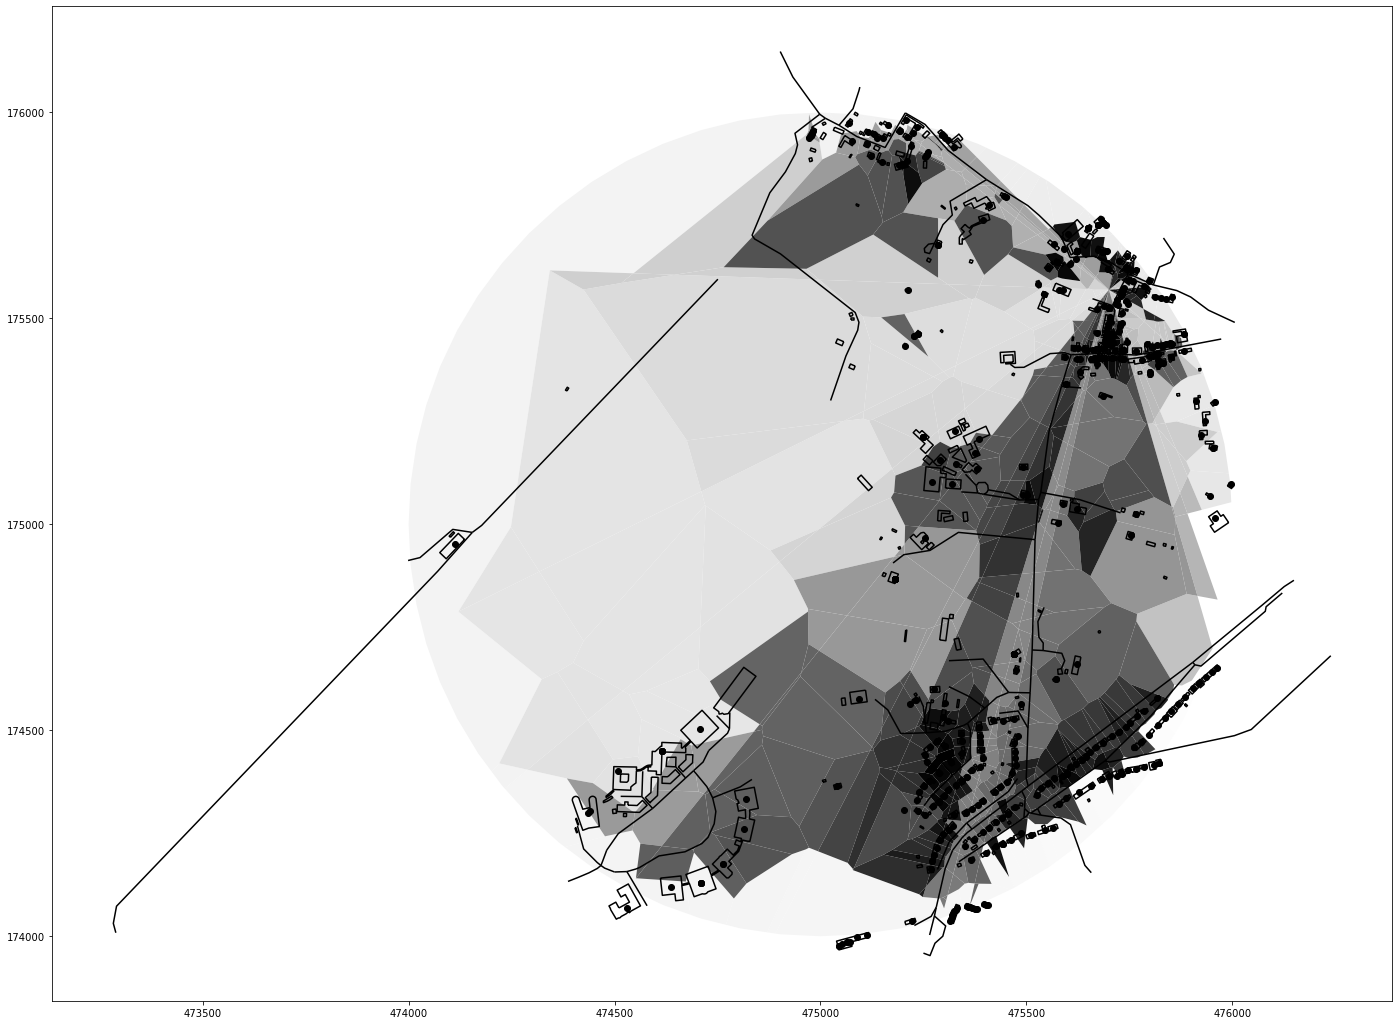

In [57]:
f, ax = plt.subplots(figsize=(24,24))
cells.plot(ax=ax, cmap='binary')
roads.plot(color='k', ax=ax)
buildings.boundary.plot(color='k', ax=ax)
properties.plot(color='k', ax=ax)